In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree  import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Import the data


In [2]:
df1=pd.read_csv("C:\\Users\\work\\Downloads\\folders for machine learning\\heart+disease\\processed.switzerland compressed.zip")
print('p')

p


In [3]:
df1.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
#giving names to the columns

In [4]:
df=df1.replace('?',np.nan)#to replce ? values with nan values

In [5]:
for i in df.columns:
    print(f' sum of total null values in {i} is',df[i].isnull().sum())#to check for total no of null values in each columns

 sum of total null values in age is 0
 sum of total null values in sex is 0
 sum of total null values in cp is 0
 sum of total null values in restbp is 2
 sum of total null values in chol is 0
 sum of total null values in fbs is 74
 sum of total null values in restecg is 1
 sum of total null values in thalach is 1
 sum of total null values in exang is 1
 sum of total null values in oldpeak is 6
 sum of total null values in slope is 17
 sum of total null values in ca is 117
 sum of total null values in thal is 51
 sum of total null values in hd is 0


In [6]:
df=df.drop(['ca'],axis=1)
df=df.drop(['fbs'],axis=1)
df=df.drop(['thal'],axis=1)#to drop columns that has large no of null values

In [7]:
print(df)

     age  sex  cp restbp  chol restecg thalach exang oldpeak slope  hd
0     34    1   4    115     0     NaN     154     0      .2     1   1
1     35    1   4    NaN     0       0     130     1     NaN   NaN   3
2     36    1   4    110     0       0     125     1       1     2   1
3     38    0   4    105     0       0     166     0     2.8     1   2
4     38    0   4    110     0       0     156     0       0     2   1
..   ...  ...  ..    ...   ...     ...     ...   ...     ...   ...  ..
117   70    1   4    115     0       1      92     1       0     2   1
118   70    1   4    140     0       0     157     1       2     2   3
119   72    1   3    160     0       2     114     0     1.6     2   0
120   73    0   3    160     0       1     121     0       0     1   1
121   74    1   2    145     0       1     123     0     1.3     1   1

[122 rows x 11 columns]


In [8]:
for i in df.columns:
    print(f' sum of total null values in {i} is',df[i].isnull().sum())


 sum of total null values in age is 0
 sum of total null values in sex is 0
 sum of total null values in cp is 0
 sum of total null values in restbp is 2
 sum of total null values in chol is 0
 sum of total null values in restecg is 1
 sum of total null values in thalach is 1
 sum of total null values in exang is 1
 sum of total null values in oldpeak is 6
 sum of total null values in slope is 17
 sum of total null values in hd is 0


# Dividing data in train and test so that we can fill missing values using logistic regression

In [9]:
traindf=df[df['slope'].isnull()==False]#slope has 17 missing values so we will be trying to fill in the slope using logistic regression
testdf=df[df['slope'].isnull()==True]#dividing data sets into 2 parts,one contains missing values and another doesnt contains missing values
traindf

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope,hd
0,34,1,4,115,0,NaN,154,0,.2,1,1
2,36,1,4,110,0,0,125,1,1,2,1
3,38,0,4,105,0,0,166,0,2.8,1,2
4,38,0,4,110,0,0,156,0,0,2,1
5,38,1,3,100,0,0,179,0,-1.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
117,70,1,4,115,0,1,92,1,0,2,1
118,70,1,4,140,0,0,157,1,2,2,3
119,72,1,3,160,0,2,114,0,1.6,2,0
120,73,0,3,160,0,1,121,0,0,1,1


In [10]:
traindf.iloc[1,1]=np.nan#substituting a known value with nan value just for fun

traindf

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope,hd
0,34,1.0,4,115,0,NaN,154,0,.2,1,1
2,36,NaN,4,110,0,0,125,1,1,2,1
3,38,0.0,4,105,0,0,166,0,2.8,1,2
4,38,0.0,4,110,0,0,156,0,0,2,1
5,38,1.0,3,100,0,0,179,0,-1.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
117,70,1.0,4,115,0,1,92,1,0,2,1
118,70,1.0,4,140,0,0,157,1,2,2,3
119,72,1.0,3,160,0,2,114,0,1.6,2,0
120,73,0.0,3,160,0,1,121,0,0,1,1


# filling the 2  unknown values in train df

In [11]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')#making an imputer 

In [12]:
imputer.fit(traindf)#fitting data to imputer
traindf=imputer.transform(traindf)#transforming the imputer data

In [13]:
#the filled data will be in the form of numpy array and information about the column will be lost
traindf=pd.DataFrame(traindf,columns=imputer.get_feature_names_out())#get_feature_names_out will get the column name from traindf and fill the columns names in pandas dataframe
traindf

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope,hd
0,34.0,1.0,4.0,115.0,0.0,0.0,154.0,0.0,0.2,1.0,1.0
1,36.0,1.0,4.0,110.0,0.0,0.0,125.0,1.0,1.0,2.0,1.0
2,38.0,0.0,4.0,105.0,0.0,0.0,166.0,0.0,2.8,1.0,2.0
3,38.0,0.0,4.0,110.0,0.0,0.0,156.0,0.0,0.0,2.0,1.0
4,38.0,1.0,3.0,100.0,0.0,0.0,179.0,0.0,-1.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
100,70.0,1.0,4.0,115.0,0.0,1.0,92.0,1.0,0.0,2.0,1.0
101,70.0,1.0,4.0,140.0,0.0,0.0,157.0,1.0,2.0,2.0,3.0
102,72.0,1.0,3.0,160.0,0.0,2.0,114.0,0.0,1.6,2.0,0.0
103,73.0,0.0,3.0,160.0,0.0,1.0,121.0,0.0,0.0,1.0,1.0


In [14]:
for i in traindf.columns:
   print(f' sum of total null values in {i} is',traindf[i].isnull().sum())

 sum of total null values in age is 0
 sum of total null values in sex is 0
 sum of total null values in cp is 0
 sum of total null values in restbp is 0
 sum of total null values in chol is 0
 sum of total null values in restecg is 0
 sum of total null values in thalach is 0
 sum of total null values in exang is 0
 sum of total null values in oldpeak is 0
 sum of total null values in slope is 0
 sum of total null values in hd is 0


In [15]:
traindf

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope,hd
0,34.0,1.0,4.0,115.0,0.0,0.0,154.0,0.0,0.2,1.0,1.0
1,36.0,1.0,4.0,110.0,0.0,0.0,125.0,1.0,1.0,2.0,1.0
2,38.0,0.0,4.0,105.0,0.0,0.0,166.0,0.0,2.8,1.0,2.0
3,38.0,0.0,4.0,110.0,0.0,0.0,156.0,0.0,0.0,2.0,1.0
4,38.0,1.0,3.0,100.0,0.0,0.0,179.0,0.0,-1.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
100,70.0,1.0,4.0,115.0,0.0,1.0,92.0,1.0,0.0,2.0,1.0
101,70.0,1.0,4.0,140.0,0.0,0.0,157.0,1.0,2.0,2.0,3.0
102,72.0,1.0,3.0,160.0,0.0,2.0,114.0,0.0,1.6,2.0,0.0
103,73.0,0.0,3.0,160.0,0.0,1.0,121.0,0.0,0.0,1.0,1.0


In [40]:
testd=testdf[testdf.isnull().sum(axis=1)<4]#to remove rows with more than 4 unknown values in testdf
testd

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope,hd
1,35,1,4,NaN,0,0,130,1,NaN,NaN,3
7,38,1,4,135,0,0,150,0,0,NaN,2
8,38,1,4,150,0,0,120,1,NaN,NaN,1
19,47,1,3,110,0,0,120,1,0,NaN,1
24,50,0,4,160,0,0,110,0,0,NaN,1
32,51,1,4,130,0,1,163,0,0,NaN,1
38,52,1,4,95,0,0,82,1,NaN,NaN,2
42,53,1,3,160,0,2,122,1,0,NaN,1
65,57,1,4,140,0,0,100,1,0,NaN,3
70,58,1,4,170,0,1,105,1,0,NaN,1


In [48]:
#we will try to fill 'old peak' and 'restbp' with simple imputer


imputer1=SimpleImputer(missing_values=np.nan,strategy='median')

##without reshape it will give error and without values it will givve error,reshape helps in changing the shape of 1d array in 2d array,values convert pandas arryay into numpy array

imputer1.fit(testd.oldpeak.values.reshape(-1,1))#fitting old peak into the imputer
testd.oldpeak=imputer1.transform(testd.oldpeak.values.reshape(-1,1))#transforming oldpeak


imputer2=SimpleImputer(missing_values=np.nan,strategy='median')#
imputer2.fit(testd.restbp.values.reshape(-1,1))#fitting 'restbp' into imputer 2
testd.restbp=imputer2.transform(testd.restbp.values.reshape(-1,1))#transforming 'restbp'


testd.oldpeak

C:\Users\work\AppData\Local\Temp\ipykernel_16248\400268650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testd.oldpeak=imputer1.transform(testd.oldpeak.values.reshape(-1,1))#transforming oldpeak
C:\Users\work\AppData\Local\Temp\ipykernel_16248\400268650.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testd.restbp=imputer2.transform(testd.restbp.values.reshape(-1,1))#transforming 'restbp'


1      0.0
7      0.0
8      0.0
19     0.0
24     0.0
32     0.0
38     0.0
42     0.0
65     0.0
70     0.0
72     0.0
82     0.0
91     0.0
107    0.0
109    0.0
110    0.0
Name: oldpeak, dtype: float64

In [49]:
testd.oldpeak

1      0.0
7      0.0
8      0.0
19     0.0
24     0.0
32     0.0
38     0.0
42     0.0
65     0.0
70     0.0
72     0.0
82     0.0
91     0.0
107    0.0
109    0.0
110    0.0
Name: oldpeak, dtype: float64

In [50]:
type(testd.oldpeak.values)

numpy.ndarray

In [51]:
testd

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope,hd
1,35,1,4,145.0,0,0,130,1,0.0,NaN,3
7,38,1,4,135.0,0,0,150,0,0.0,NaN,2
8,38,1,4,150.0,0,0,120,1,0.0,NaN,1
19,47,1,3,110.0,0,0,120,1,0.0,NaN,1
24,50,0,4,160.0,0,0,110,0,0.0,NaN,1
32,51,1,4,130.0,0,1,163,0,0.0,NaN,1
38,52,1,4,95.0,0,0,82,1,0.0,NaN,2
42,53,1,3,160.0,0,2,122,1,0.0,NaN,1
65,57,1,4,140.0,0,0,100,1,0.0,NaN,3
70,58,1,4,170.0,0,1,105,1,0.0,NaN,1


In [52]:
#dividing our data into into train and test split so that we can use logistic regression to fill in the missing values of slope

x_train=traindf.drop('slope',axis=1)
y_train=traindf[('slope')]
x_test=testd.loc[ : ,testdf.columns!='slope']

index_no=traindf.columns.get_loc('slope')#to get index no of 'slope',it will be useful later
index_no

9

In [53]:
from sklearn.linear_model import LogisticRegression 
classifier=LogisticRegression(random_state=0)#importing and fitting data into logistic regression
classifier.fit(x_train,y_train)


C:\Users\work\anaconda3\envs\jupyter_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [54]:
y_pred=classifier.predict(x_test)#predicted values of slope
print(y_pred)

[2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.]


In [55]:
x_test.insert(9,'slope',y_pred,allow_duplicates=False)#attaching 'y_pred' to x_test to at index 9 

In [56]:
x_train.insert(9,'slope',y_train,allow_duplicates=False)#attaching y_train to x_train at index 9

In [57]:
print(x_test)
print(x_train)

     age  sex  cp  restbp  chol restecg thalach exang  oldpeak  slope  hd
1     35    1   4   145.0     0       0     130     1      0.0    2.0   3
7     38    1   4   135.0     0       0     150     0      0.0    2.0   2
8     38    1   4   150.0     0       0     120     1      0.0    2.0   1
19    47    1   3   110.0     0       0     120     1      0.0    2.0   1
24    50    0   4   160.0     0       0     110     0      0.0    2.0   1
32    51    1   4   130.0     0       1     163     0      0.0    1.0   1
38    52    1   4    95.0     0       0      82     1      0.0    2.0   2
42    53    1   3   160.0     0       2     122     1      0.0    1.0   1
65    57    1   4   140.0     0       0     100     1      0.0    2.0   3
70    58    1   4   170.0     0       1     105     1      0.0    2.0   1
72    59    1   4   110.0     0       0      94     0      0.0    2.0   3
82    61    1   3   200.0     0       1      70     0      0.0    2.0   3
91    62    0   1   140.0     0       

In [64]:
finaldf=pd.concat([x_test,x_train],ignore_index=True)#merging all the dataframes into one big dataframe that will be used to predict heart disease

In [65]:
finaldf

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope,hd
0,35.0,1.0,4.0,145.0,0.0,0,130,1,0.0,2.0,3.0
1,38.0,1.0,4.0,135.0,0.0,0,150,0,0.0,2.0,2.0
2,38.0,1.0,4.0,150.0,0.0,0,120,1,0.0,2.0,1.0
3,47.0,1.0,3.0,110.0,0.0,0,120,1,0.0,2.0,1.0
4,50.0,0.0,4.0,160.0,0.0,0,110,0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
116,70.0,1.0,4.0,115.0,0.0,1.0,92.0,1.0,0.0,2.0,1.0
117,70.0,1.0,4.0,140.0,0.0,0.0,157.0,1.0,2.0,2.0,3.0
118,72.0,1.0,3.0,160.0,0.0,2.0,114.0,0.0,1.6,2.0,0.0
119,73.0,0.0,3.0,160.0,0.0,1.0,121.0,0.0,0.0,1.0,1.0


In [66]:
for i in finaldf.columns:
    print(f'total no of nan values in {i}=',finaldf[i].isnull().sum())

total no of nan values in age= 0
total no of nan values in sex= 0
total no of nan values in cp= 0
total no of nan values in restbp= 0
total no of nan values in chol= 0
total no of nan values in restecg= 0
total no of nan values in thalach= 0
total no of nan values in exang= 0
total no of nan values in oldpeak= 0
total no of nan values in slope= 0
total no of nan values in hd= 0


In [67]:
for i in finaldf.columns:
    print(f'total unique values in {i}=',finaldf[i].unique())

total unique values in age= [35. 38. 47. 50. 51. 52. 53. 57. 58. 59. 61. 62. 65. 66. 34. 36. 40. 41.
 42. 43. 45. 46. 48. 54. 55. 56. 60. 63. 64. 67. 68. 69. 70. 72. 73. 74.]
total unique values in sex= [1. 0.]
total unique values in cp= [4. 3. 1. 2.]
total unique values in restbp= [145. 135. 150. 110. 160. 130.  95. 140. 170. 200. 155. 115. 105. 100.
 125. 120. 165.  80. 180. 185.]
total unique values in chol= [0.]
total unique values in restecg= ['0' '1' '2' 0.0 1.0 2.0]
total unique values in thalach= ['130' '150' '120' '110' '163' '82' '122' '100' '105' '94' '70' '143' '67'
 '90' 154.0 125.0 166.0 156.0 179.0 128.0 144.0 176.0 99.0 122.0 145.0
 140.0 138.0 133.0 113.0 118.0 149.0 124.0 120.0 139.0 127.0 92.0 104.0
 170.0 60.0 126.0 95.0 115.0 135.0 141.0 155.0 110.0 150.0 83.0 97.0 98.0
 82.0 100.0 148.0 103.0 121.0 131.0 182.0 175.0 119.0 143.0 130.0 63.0
 105.0 77.0 117.0 123.0 134.0 72.0 78.0 109.0 86.0 114.0 93.0 108.0 136.0
 157.0]
total unique values in exang= ['1' '0' 0.0 1.

# Format data :-Split Data into Dependent and Independent Variables

In [68]:
x=finaldf.drop('hd',axis=1).copy() #hd stands for heart diesease
x.head()

,age,sex,cp,restbp,chol,restecg,thalach,exang,oldpeak,slope
0,35.0,1.0,4.0,145.0,0.0,0,130,1,0.0,2.0
1,38.0,1.0,4.0,135.0,0.0,0,150,0,0.0,2.0
2,38.0,1.0,4.0,150.0,0.0,0,120,1,0.0,2.0
3,47.0,1.0,3.0,110.0,0.0,0,120,1,0.0,2.0
4,50.0,0.0,4.0,160.0,0.0,0,110,0,0.0,2.0


In [69]:
y=finaldf['hd'].copy()
y.head()

0    3.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: hd, dtype: float64

# Format the Data Part2: One-Hot Encoding

In [70]:
x.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
restecg     object
thalach     object
exang       object
oldpeak    float64
slope      float64
dtype: object

In [71]:
print(x['restecg'].unique(),x['thalach'].unique(),x['exang'].unique(),x['oldpeak'].unique())

['0' '1' '2' 0.0 1.0 2.0] ['130' '150' '120' '110' '163' '82' '122' '100' '105' '94' '70' '143' '67'
 '90' 154.0 125.0 166.0 156.0 179.0 128.0 144.0 176.0 99.0 122.0 145.0
 140.0 138.0 133.0 113.0 118.0 149.0 124.0 120.0 139.0 127.0 92.0 104.0
 170.0 60.0 126.0 95.0 115.0 135.0 141.0 155.0 110.0 150.0 83.0 97.0 98.0
 82.0 100.0 148.0 103.0 121.0 131.0 182.0 175.0 119.0 143.0 130.0 63.0
 105.0 77.0 117.0 123.0 134.0 72.0 78.0 109.0 86.0 114.0 93.0 108.0 136.0
 157.0] ['1' '0' 0.0 1.0] [ 0.   0.2  1.   2.8 -1.1  1.6 -1.5  1.5  2.   0.5 -0.1 -2.6  2.1  0.7
 -0.7  2.2  3.   0.1  0.3 -2.  -1.   1.8  1.4  2.6  0.9  2.4  1.1  0.4
  2.5  1.7 -0.8 -0.5 -0.9  3.7  1.3]


In [72]:
for i in x.columns:            #some data are in object format that is that some of integer input is given in form of strings 
    if x.dtypes[i] != 'float64':#this becomes a problem when hot encoding data because scikit learn gives strings and integers
        x[i]=x[i].astype(float)#different vectors even though there values are the same
        
x.dtypes          #this for loop converts all the string data into float data

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
dtype: object

In [73]:
x_encoded=pd.get_dummies(x,columns=['cp','restecg','slope'])

x_encoded

,age,sex,restbp,chol,thalach,exang,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0
0,35.0,1.0,145.0,0.0,130.0,1.0,0.0,False,False,False,True,True,False,False,False,True,False
1,38.0,1.0,135.0,0.0,150.0,0.0,0.0,False,False,False,True,True,False,False,False,True,False
2,38.0,1.0,150.0,0.0,120.0,1.0,0.0,False,False,False,True,True,False,False,False,True,False
3,47.0,1.0,110.0,0.0,120.0,1.0,0.0,False,False,True,False,True,False,False,False,True,False
4,50.0,0.0,160.0,0.0,110.0,0.0,0.0,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,70.0,1.0,115.0,0.0,92.0,1.0,0.0,False,False,False,True,False,True,False,False,True,False
117,70.0,1.0,140.0,0.0,157.0,1.0,2.0,False,False,False,True,True,False,False,False,True,False
118,72.0,1.0,160.0,0.0,114.0,0.0,1.6,False,False,True,False,False,False,True,False,True,False
119,73.0,0.0,160.0,0.0,121.0,0.0,0.0,False,False,True,False,False,True,False,True,False,False


In [74]:
y_not_equal_to_zero=y>0 #get the index for each non-zero value in y
y[y_not_equal_to_zero]=1 #set each non-zero in y to 1
y.unique() #verify that y only contain 0 and 1


array([1., 0.])

# Building a preliminary class tree

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42)#splitting data into train and test

In [76]:
#create a decision tree and fit it to the training data
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(x_train,y_train)

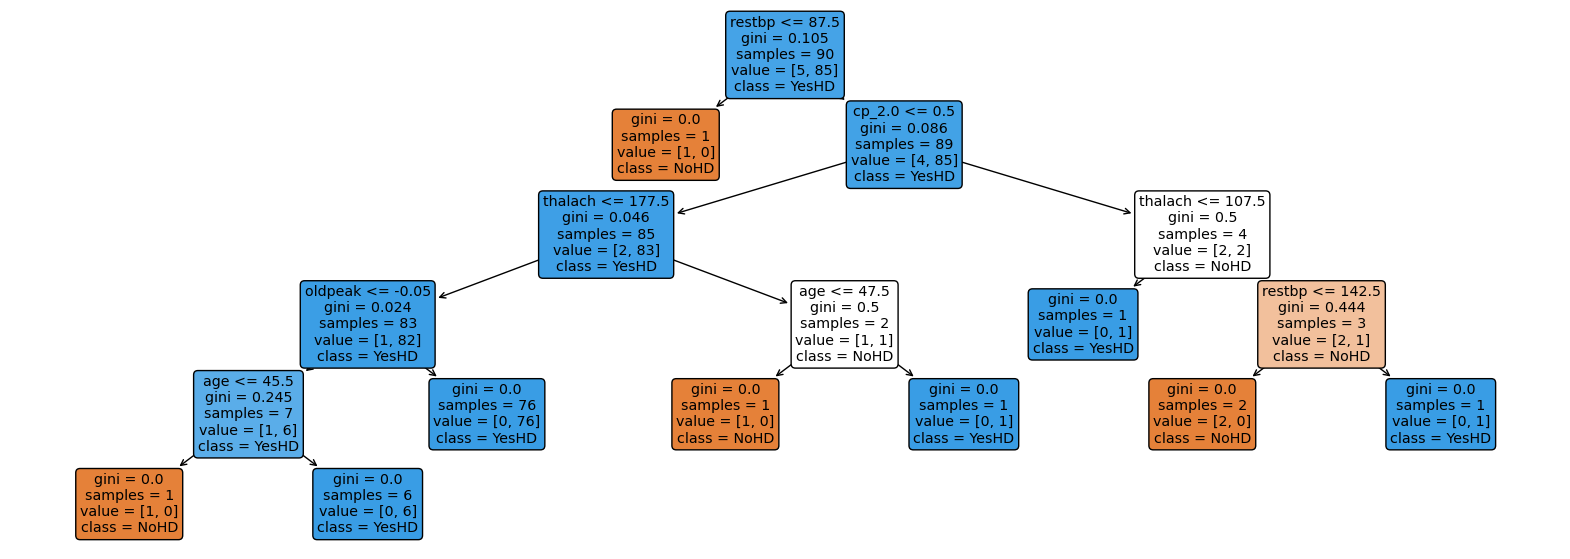

In [77]:
#we can plot the tree the tree and it is huge
plt.figure(figsize=(20,7))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['NoHD','YesHD'],feature_names=x_encoded.columns);

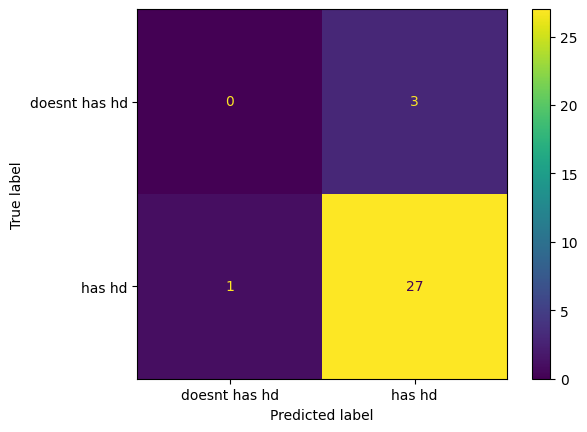

In [78]:
#plot_confusion matrix will run the test data down the tree and draw a confusion matrix
predicted_values=clf_dt.predict(x_test)
cm=confusion_matrix(y_test,predicted_values,labels=clf_dt.classes_)#labels can only take the numpy array[0,1]
 #clf_dt.classes_ assign that value to labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array(['doesnt has hd','has hd']))
# here we can assign names to the 0 and 1 in labels
disp.plot()


In [79]:
#results=0 True negatives,1 False negative,3False positive,27 True positives

# Cost complexity pruning:-Visualize alpha

In [80]:
path=clf_dt.cost_complexity_pruning_path(x_train,y_train)#determine values for alpha
ccp_alphas=path.ccp_alphas#extract different values for alphas
ccp_alphas=ccp_alphas[:-1]#exclude the maximum value for alpha

clf_dts=[]#creating an array that we will put decison tree into

#now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)
    

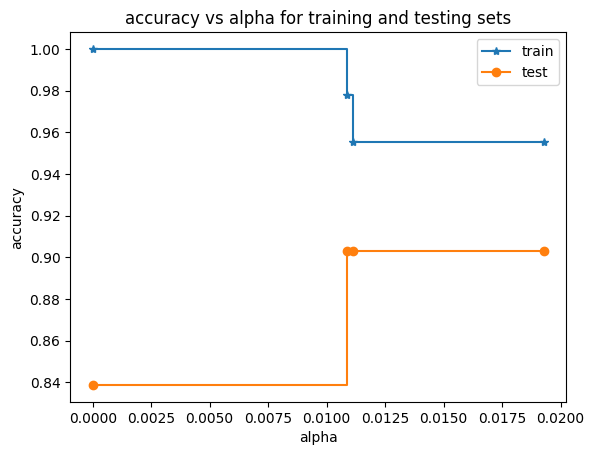

In [81]:
train_score = [clf_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_score = [clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_score,marker='*',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_score,marker='o',label='test',drawstyle='steps-post')

ax.legend()
plt.show()

In [82]:
print(test_score,ccp_alphas)

[0.8387096774193549, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129] [0.         0.01084967 0.01111111 0.01927297]


# cost complexity pruning 2: Cross validation for finding the best alpha

<Axes: xlabel='tree'>

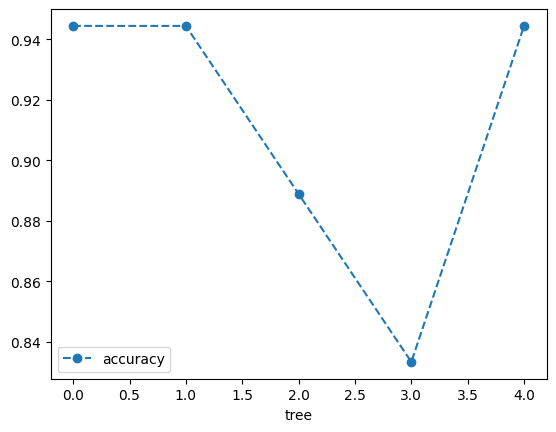

In [83]:
clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=0.01111111)  #create the tree with ccp alpha=0.016
# now use 5-fold cross validation create 5 differnt training and testing datasets
#are then used to train and test the tree
#NOTE:We use 5-fold because we dont have tons of data

scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [84]:
#alpha is dependent on the data,for some values of alpha we get bad accuracy and for other alphas we get good accuracy therefore we will be using cross validation on differnt alphas and differnt datasets to find the optimum alpha that will work for all cases

<Axes: xlabel='alpha'>

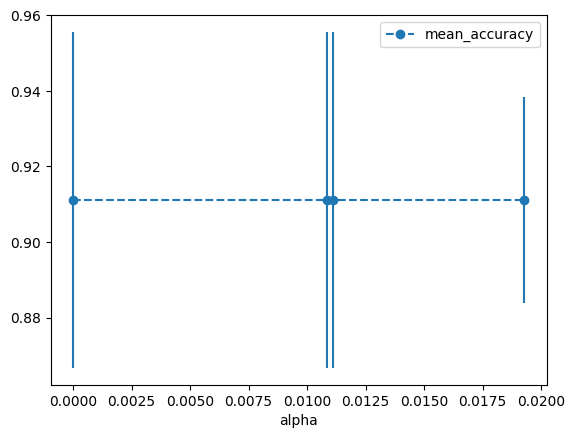

In [85]:
#create an array to store the results of each fold during cross validation
alpha_loop_values=[]

#for each value of alpha we will run 5 fold cross validation and then we will store the mean and standard deviation of the scores foe each call

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])    

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [86]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.911111,0.044444
1,0.010850,0.911111,0.044444
2,0.011111,0.911111,0.044444
3,0.019273,0.911111,0.027217


In [87]:
  alpha_results[(alpha_results['alpha']>0.0175) &(alpha_results['alpha']<0.0200 )]

,alpha,mean_accuracy,std
3,0.019273,0.911111,0.027217


In [88]:
ideal_ccp_alpha=alpha_results[((alpha_results['alpha']>0.0175) &(alpha_results['alpha']<0.0200 ))]['alpha']
type(ideal_ccp_alpha)

pandas.core.series.Series

In [89]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

C:\Users\work\AppData\Local\Temp\ipykernel_16248\809032274.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha=float(ideal_ccp_alpha)


0.019272967614011954

In [90]:
#building a better decision tree with optimal value for alpha
clf_dt_pruned=DecisionTreeClassifier(random_state=40,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(x_train,y_train)


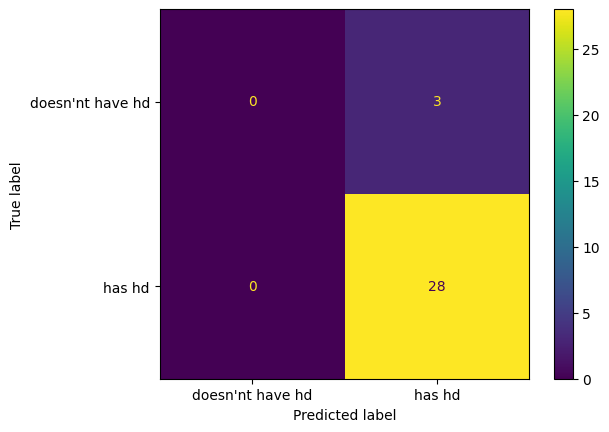

In [91]:
pred_val=clf_dt_pruned.predict(x_test)
cm=confusion_matrix(y_test,pred_val,labels=clf_dt_pruned.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['doesn\'nt have hd','has hd'])

disp.plot()

# CONCLUSION

In [92]:
#The final decision tree has 90% accuracy rate and can predict 100% of  heart deasease but 0 percent of non-heart disease,this is probably due to lack of data from patients who doesnt have heart disease
#A better thing to do would be to use data that has more no of heart disease

#       ~~~~ THE END ~~~~~

# saving the ml model 



In [96]:
import pickle

In [97]:
filename= 'heart diseases.Dt'

In [98]:
pickle.dump(clf_dt_pruned,open(filename,'wb'))


In [99]:
load_model=pickle.load(open(filename,'rb'))

In [100]:
r=load_model.score(x_test,y_test)

In [101]:
r

0.9032258064516129